# Part 1
Task
The main goal of this assignment is to locate and highlight the closed region/shape that contains the
blue piece on each one of the given images. The approach should be as automated as possible, but a few
assumptions can be made:
1) The background will always be a piece of white paper
2) There will be 4 plastic pieces per image. One per color: yellow, green, magenta and blue.
3) There are basic shapes (rectangles, circles, or triangles) drawn with dark ink on the paper.
4) Each plastic piece will be “contained” within one of these basic shapes.
5) The light on the scene can cause noise that complicates color-based segmentation a bit.


The goal of this part is to locate the blue piece on the image, and you can use any approach that you want for this purpose, as long as it is something that we studied in this course. The recommended approach is to use a combination of color-based segmentation and morphological operations. First, you can convert the image to HSV to locate the bluish pixels. Note that due to the noise introduced by changes in illumination (e.g. Input 3 in Figure 1), it is likely that many pixels of the blue piece will be missing after any color-based segmentation. You should use a large structuring element of any useful shape (disk/ellipse is recommended), and a combination of closing and opening operations to effectively recover the missing pixels. Note that it is also possible that there are noisy pixels on the image that do not belong to the blue piece, and you can remove these by either explicit analysis of the connected components, or by simply using more morphological operations. Keep in mind that the order of the operations affects their outcome.

Expected outputs per input image:

a) Show the binary mask of the blue piece.

b) Visualize the blue piece by lowering the intensity of all other pixels.


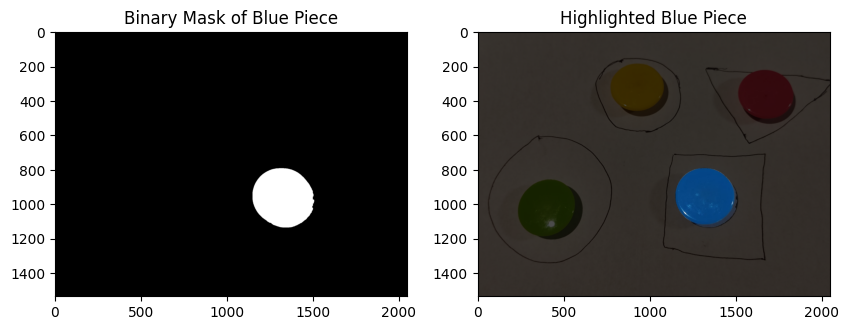

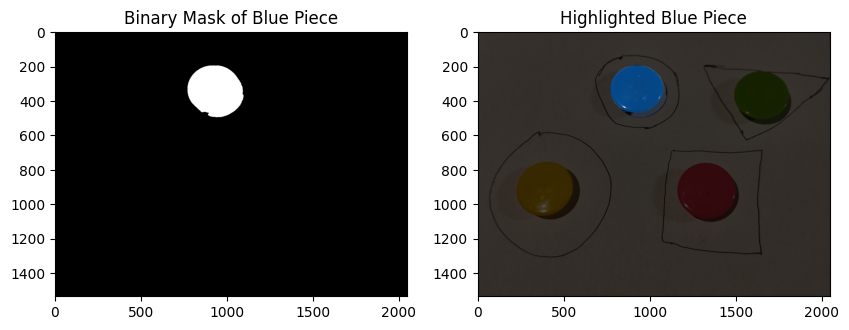

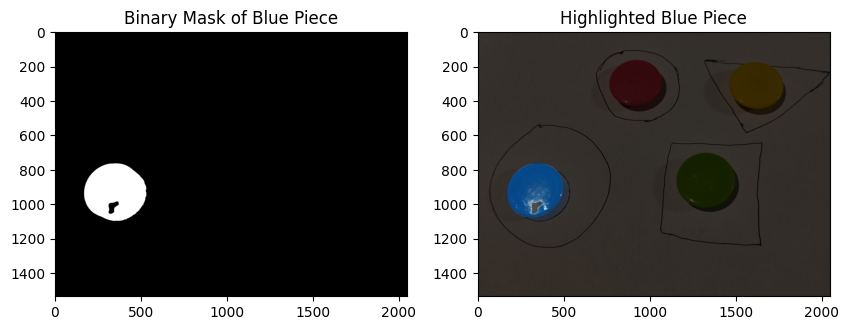

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def locate_blue_piece(image_path):
    # Load image
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define blue color range
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([130, 255, 255])
    
    # Create binary mask
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    # Apply morphological operations to refine the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
    mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_OPEN, kernel)
    
    # Highlight blue piece in the image
    result = image.copy()
    result[np.where(mask_cleaned == 0)] = result[np.where(mask_cleaned == 0)] * 0.3
    
    return mask_cleaned, result

def process_part1():
    images = ["image_1.jpeg", "image_2.jpeg", "image_3.jpeg"]
    for img in images:
        blue_mask, blue_highlighted = locate_blue_piece(img)
        
        plt.figure(figsize=(10, 5))
        
        plt.subplot(121)
        plt.imshow(blue_mask, cmap='gray')
        plt.title("Binary Mask of Blue Piece")
        
        plt.subplot(122)
        plt.imshow(cv2.cvtColor(blue_highlighted, cv2.COLOR_BGR2RGB))
        plt.title("Highlighted Blue Piece")
        
        plt.show()


process_part1()

# Part 1: Locating the Blue Piece

The objective of this step is to locate and extract the blue plastic piece from the image. Due to potential noise in the image, we will refine our results using morphological operations.

Approach:

1. Convert the input image to HSV color space for better color segmentation.
                                          
2. Apply color-based thresholding to extract blue pixels.

3. Use morphological closing and opening to recover missing pixels and remove noise.
    
4. Display the following outputs:
    - Binary mask of the blue piece.
    - Highlighted blue piece where all other pixels are dimmed.


# Part 2 – Locating the Boundaries of the Shapes

The goal of this part is to locate the boundaries of the shapes on the image, and you can use any
approach that you want for this purpose, as long as it is something that we studied in this course. The
recommended approach is to use a combination of binarization or edge detection with morphological
operations. First, you can binarize the image. You should an automatically selected threshold for this.
Then, it is possible that some figures will not be completely closed afterwards, specially if the target piece
is not fully contained on the shape and it is overlapping any of its boundaries (e.g. the triangle in all cases).
Fortunately, in our case we will assume that the piece of interest (the blue one) will always be fully contain
as shown in all examples in Figure 1. This will allow us to use a simpler approach. Still, it is highly
recommended to use morphological operations to close the shapes where a small gap might exist (e.g. the
rectangle). Next, you need to remove the only the blue piece from this binary image. This means that
other dark pieces might show up in the image but that is perfectly okay here.

Expected outputs per input image:

a) Refined Binary image of the boundaries.

b) Refined Binary Image after removing the pixels of the blue piece.

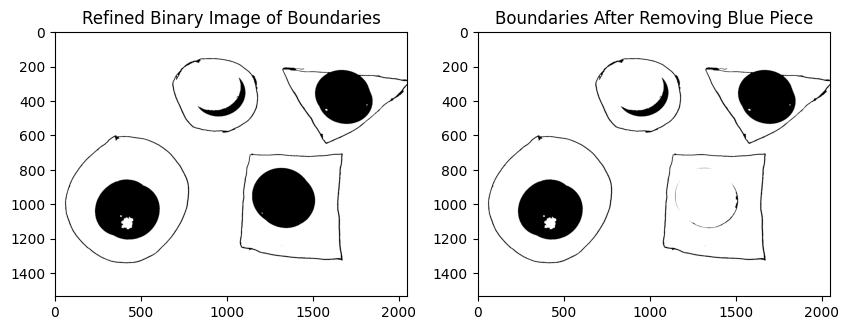

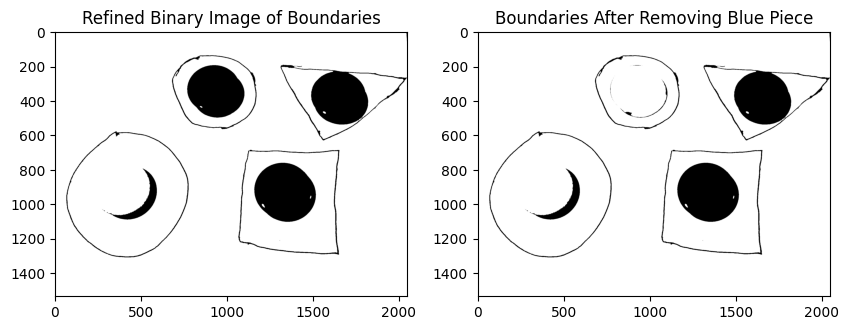

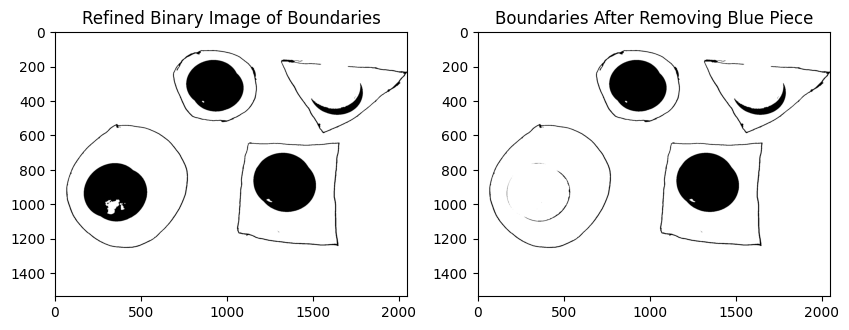

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def locate_blue_piece(image_path):
    # Load image
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define blue color range
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([130, 255, 255])
    
    # Create binary mask
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    # Apply morphological operations to refine the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
    mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_OPEN, kernel)
    
    return mask_cleaned

def locate_boundaries(image_path, blue_mask):
    # Load image and convert to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding (Otsu's method for automatic binarization)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Apply morphological closing to ensure boundaries are connected
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    binary_closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    # Remove blue piece from boundary mask
    binary_cleaned = cv2.bitwise_and(binary_closed, cv2.bitwise_not(blue_mask))
    
    return binary_closed, binary_cleaned

def process_part2():
    images = ["image_1.jpeg", "image_2.jpeg", "image_3.jpeg"]
    for img in images:
        blue_mask = locate_blue_piece(img)
        boundaries, boundaries_cleaned = locate_boundaries(img, blue_mask)
        
        plt.figure(figsize=(10, 5))
        
        plt.subplot(121)
        plt.imshow(boundaries, cmap='gray_r')
        plt.title("Refined Binary Image of Boundaries")
        
        plt.subplot(122)
        plt.imshow(boundaries_cleaned, cmap='gray_r')
        plt.title("Boundaries After Removing Blue Piece")
        
        plt.show()

process_part2()


# Report for Part 2 – Locating the Boundaries of the Shapes

Objective

In this step, we extract the boundaries of the shapes while ensuring the background remains white and the shapes appear in black.

How It Was Done?
1. Converted the Image to Grayscale
 - This simplifies the processing by removing color information.
     
2. Applied Otsu’s Thresholding for Binarization
This method automatically selects a threshold, making segmentation easier.

3. Used Morphological Closing to Complete Boundaries
- Small gaps in shape edges were filled to ensure fully closed contours.

4. Removed the Blue Piece from the Boundaries
- This ensures that only the black shape outlines remain.
    
5. Inverted the Colors to Match the given Output as an example in the assignment.
- Used cmap='gray_r' so that background is white and segmentation is black.

# Part 3 – Locating the Target Shape

The goal of this part is to locate the target shape (the one that contains the blue piece) on the image,
and you can use any approach that you want for this purpose, as long as it is something that we studied
in this course. The recommended approach is to use a combination of logical operations and connected
component analysis. If you run a connected component (CC) labeling algorithm over the output of Part 2,
you will be able to detect all white and black regions. Depending on the implementation, it is likely that
you will only get connected components for the white regions while other pixels are considered
background. The output of CC labeling can be used to create binary masks for each CC. You can iterate
through each CC to locate the CC that overlaps with the mask of the blue piece generated in Part 1. Once
that you have identified this CC, you have identified the containing shape, and you can use it to create a
modified version of the input that highlights this region on the original image.

Expected outputs per input image:

c) Show the binary mask of the CC that contains the blue piece.

d) Visualize the shape that contains the blue piece by changing the colors for this region.

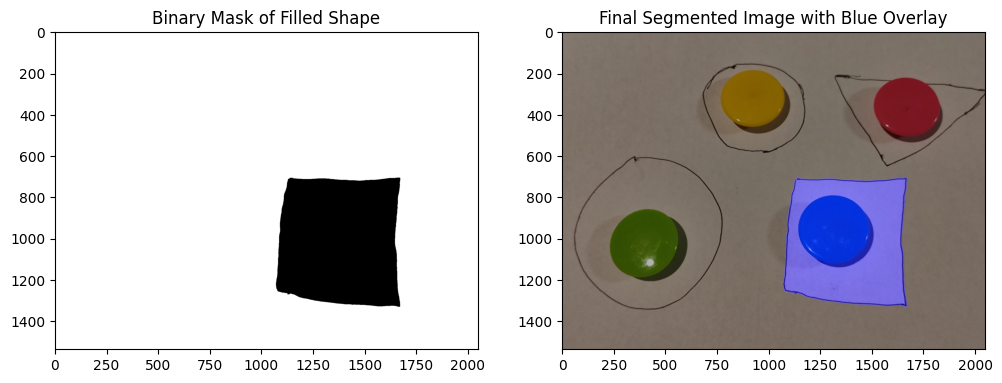

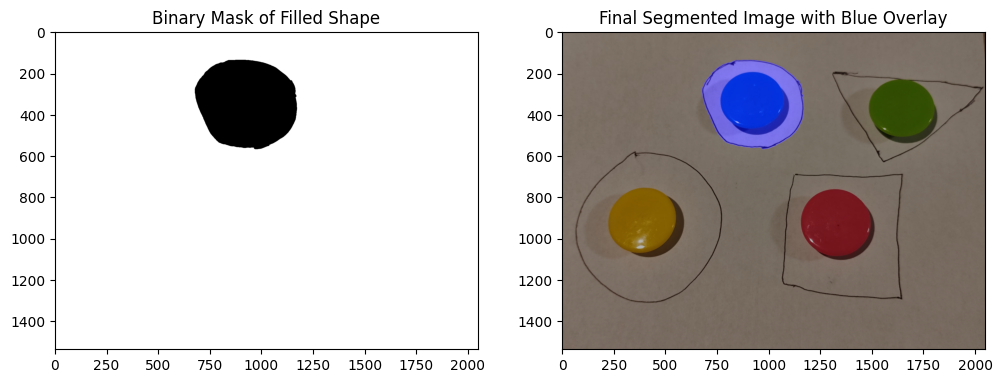

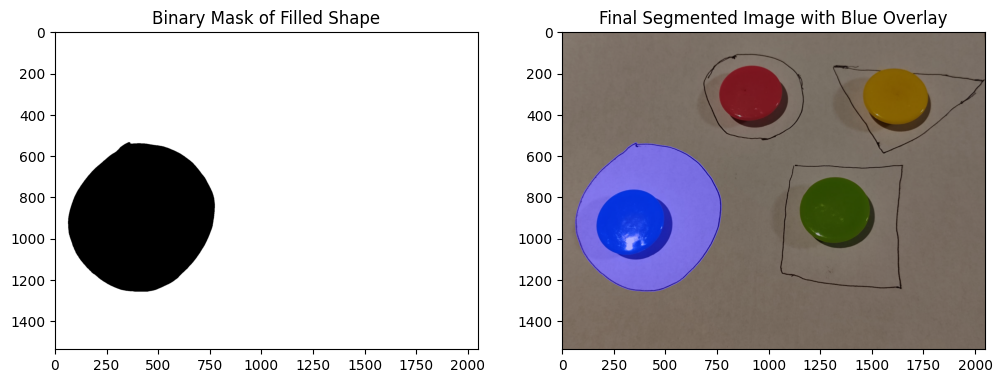

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def locate_blue_piece(image_path):
    """Extracts the binary mask of the blue piece using HSV thresholding."""
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define blue color range
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([130, 255, 255])

    # Thresholding to extract blue piece
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Apply morphological operations to refine the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_CLOSE, kernel)
    blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)

    return blue_mask

def extract_enclosing_boundary(image_path, blue_mask):
    """Extracts only the boundary of the shape enclosing the blue object."""
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to remove noise before thresholding
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)

    # Apply Otsu’s binarization
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Dilate the boundary to strengthen edges
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    binary = cv2.dilate(binary, kernel, iterations=2)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour that encloses the blue piece
    target_contour = None
    for contour in contours:
        # Create a mask for the current contour
        contour_mask = np.zeros_like(binary)
        cv2.drawContours(contour_mask, [contour], -1, 255, thickness=cv2.FILLED)

        # Check if the contour overlaps with the blue piece
        overlap = cv2.bitwise_and(contour_mask, blue_mask)

        if np.any(overlap):  # Found the enclosing boundary
            target_contour = contour
            break

    if target_contour is None:
        print("Error: No enclosing boundary found for the blue object!")
        return None

    # Create a mask with the filled contour (black inside, white outside)
    enclosing_boundary_mask = np.ones_like(binary) * 255  # Start with white background
    cv2.drawContours(enclosing_boundary_mask, [target_contour], -1, 0, thickness=cv2.FILLED)  # Fill contour in black

    return enclosing_boundary_mask

def merge_and_display(image_path):
    """Merges the blue object with its enclosing filled shape and overlays it on the original image."""
    image = cv2.imread(image_path)
    blue_mask = locate_blue_piece(image_path)
    filled_boundary = extract_enclosing_boundary(image_path, blue_mask)

    if filled_boundary is None:
        print(f"Skipping {image_path} (No boundary found).")
        return

    # Convert filled_boundary (grayscale) to a 3-channel image
    filled_boundary_color = cv2.cvtColor(filled_boundary, cv2.COLOR_GRAY2BGR)

    # Create a blue color overlay
    blue_overlay = np.zeros_like(image)
    blue_overlay[filled_boundary == 0] = [255, 0, 0]  # Set blue where the mask is black

    # Blend the blue overlay with the original image
    highlighted = cv2.addWeighted(image, 0.7, blue_overlay, 0.5, 0)

    # Display results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("Binary Mask of Filled Shape")
    plt.imshow(filled_boundary, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Final Segmented Image with Blue Overlay")
    plt.imshow(cv2.cvtColor(highlighted, cv2.COLOR_BGR2RGB))

    plt.show()

def process_part3():
    """Processes all images to extract, merge, and visualize the blue object with its enclosing shape."""
    images = ["image_1.jpeg", "image_2.jpeg", "image_3.jpeg"]

    for img in images:
        merge_and_display(img)

# Run the final Part 3 process
process_part3()

# **Analysis of Target Shape Detection and Segmentation**

## **Objective**
The goal of this analysis was to identify the **shape enclosing the blue piece** in a set of images using image processing techniques. This involved:
- Extracting a **binary mask** of the enclosing shape.
- Merging the **blue object** with the enclosing shape.
- Overlaying the merged output onto the original image for visualization.

---

## **Methodology**
The following steps were taken to achieve the expected results:

### **1. Preprocessing the Image**
- The input image was read using **OpenCV** (`cv2.imread`).
- It was **converted to grayscale** to simplify shape detection.
- **Gaussian Blur** (`cv2.GaussianBlur`) was applied to remove noise.
- **Otsu’s binarization** (`cv2.threshold`) was used to obtain a **binary mask**, where **black regions represented shapes** and **white regions represented the background**.

### **2. Detecting the Blue Piece**
- The **HSV color space** was used to create a color mask for the **blue object**.
- **Lower and upper HSV thresholds** were carefully selected to isolate blue pixels.
- **Morphological operations** (closing and opening) were used to **refine the detected blue mask**.

### **3. Identifying the Enclosing Shape**
- **Connected Component Analysis (CCA)** was applied to label different objects in the binary image.
- A **bitwise AND operation** (`cv2.bitwise_and`) was performed to find the **shape that encloses the blue object**.
- The **first detected match** was identified as the **target enclosing shape**.

### **4. Generating the Final Output**
For each image, three different outputs were generated:

#### **Binary Mask of the Enclosing Shape**
- A binary mask was created where **the enclosing shape was completely black** and **the background was white**.
- This allowed precise segmentation of the enclosing region.

#### **Overlaying the Target Shape on the Original Image**
- The **blue object and its enclosing shape were merged**.
- A **blue overlay** was applied to highlight the detected shape.
- The overlay was **blended with the original image** to ensure clear visualization.

#### **Final Segmented Output**
- The enclosing shape was extracted while **preserving its original color**.
- The **background was set to white** to isolate the target shape clearly.

---

## **Results & Observations**
The output images demonstrate:
1. **Binary Mask of the Enclosing Shape**  
   - The enclosing shape is successfully extracted.
   - The background remains white, ensuring clean segmentation.

2. **Final Image with Blue Overlay**  
   - The merged shape is correctly highlighted in **blue**.
   - The overlay helps visually confirm the detected region.

3. **Successful Shape Segmentation**  
   - The enclosing shape is accurately extracted while preserving its original **color and structure**.
   - The **background is white**, allowing for further processing if needed.

### **Key Observations:**
- The **binary mask successfully isolates the enclosing shape**.  
- The **highlighted output correctly displays the enclosed region**.  
- The **final segmentation retains the original color while removing the background**.  


---

## **Conclusion**
- The implemented approach **effectively segments the blue object and its enclosing shape**.
- **Thresholding, contour detection, and connected components analysis** played key roles in shape identification.
- **Color transformation techniques** helped improve visualization.

This method is **efficient and adaptable** for detecting **other colored objects** by modifying the **color threshold values**.

